# Feature extraction with lexical mining
## R and Python community characteristics



In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import re
import pickle 

import matplotlib.pyplot as plt 
import seaborn as sns

Once again we will work with the scraped data from the data science and stats stackexchanges and stack overflow. These are the same data we used last time. The code below extracts the relevant columns. Like last time most of the exercises can be completed by applying the exact same functions to each of the datasets. 

Run the code block below to get all of the data you need (you might first want to move the csv files from last time into your working directory)

In [2]:
# LOAD DATA
# Load overflow data
overflow_df = pd.read_csv('Posts_overflow.csv').dropna(subset = ['Body'])
# Load the datascience data. 
datascience_df = pd.read_csv('Posts_ds.csv').dropna(subset = ['Body'])
# load stats data
stats_df = pd.read_csv('Posts_stats.csv').dropna(subset = ['Body'])




def extract_from_to_column(df, regex, from_col, to_col):
    df[to_col] = df[from_col].apply(lambda x: ' '.join(regex.findall(x)))    
    return df

code_str = '<pre><code>.+?</code></pre>'
code_regex = re.compile(code_str, flags = re.DOTALL|re.UNICODE)


# Then we remove the code from the html body
def remove_code_from_body(df, regex):
    df['Body'] = df.Body.apply(lambda x: re.sub(regex, ' ', x))
    return df 


comment_str = '#.*$'
comment_regex = re.compile(comment_str, flags = re.DOTALL|re.UNICODE)

def get_text(html):
    soup = BeautifulSoup(html, 'lxml')
    text = soup.get_text()
    return text

def extract_text(df):    
    df['text'] = df.Body.apply(lambda x: get_text(x))    
    return df 


tag_str = '(?<=<).*?(?=>)'
tag_re = re.compile(tag_str, flags = re.DOTALL|re.UNICODE)


def tags_if_any(x, regex):
    if pd.isna(x):
        return list()
    return regex.findall(x)

def find_tags(df, regex):
    df['tags_l'] = df.Tags.apply(lambda x: tags_if_any(x, regex))
    return df 



overflow_df    = extract_from_to_column(overflow_df, code_regex, from_col = 'Body', to_col = 'code')
datascience_df = extract_from_to_column(datascience_df, code_regex, from_col = 'Body', to_col = 'code')
stats_df       = extract_from_to_column(stats_df, code_regex, from_col = 'Body', to_col = 'code')

overflow_df    = remove_code_from_body(overflow_df, code_regex)
datascience_df = remove_code_from_body(datascience_df, code_regex)
stats_df       = remove_code_from_body(stats_df, code_regex)

overflow_df = extract_from_to_column(overflow_df, comment_regex, from_col = 'code', to_col = 'comments')
datascience_df = extract_from_to_column(datascience_df, comment_regex, from_col = 'code', to_col = 'comments')
stats_df = extract_from_to_column(stats_df, comment_regex, from_col = 'code', to_col = 'comments')

overflow_df    = extract_text(overflow_df)
datascience_df = extract_text(datascience_df)
stats_df       = extract_text(stats_df)

overflow_df    = find_tags(overflow_df, tag_re).sample(20000)
datascience_df = find_tags(datascience_df, tag_re).sample(20000)
stats_df       = find_tags(stats_df, tag_re).sample(20000)


## Exercise 12.1: A simple manual lexicon approach

This assignment is intended to give you a clearer understanding of what lexical approaches are, give you some intuition for how tokenization works.

**Exercise 12.1.1** before we move on to prebuild lexicons we will construct our own simple example. Begin by defining two dictionaries with keys corresponding to the words you want to search for and a value of `1` for each key (we will simply count the number of occurences of our words). An example of lexica could be 

```python
py_lexicon = {'python': 1,
              'py': 1,
              'ipy':1}

r_lexicon = {'r': 1,
             'tidyverse': 1,
             'tidy':1}
```

Create a new column in each of the dataset which contains a list of each word in the `text` column (hint: remember to lower/upper all characters here, to match both _'Python'_ and _'python'_. Is this a good way to tokenize the text? Could you come up with improvements?



In [3]:
# [This question is in assignment 4]

**Ex 12.1.2** Count for each observation in the datasets how many times one of the words from each of the lexica occurs in the text and store the results in two new columns called `py_hits` and `r_hits`.

In [5]:
# [This question is in assignment 4]

**Ex. 12.1.3** Show the joint distribution of hits in the `r` and `py` lexica by plotting them in a scatter plot. You should plot a separate scatter for each of the forums (datasets). 

> _Hint:_ Use the following function to give the points a slight randomness in position. This is visually appealing when looking at  discrete data, and give some insight into the density.
>
> ```python
> def rand_jitter(arr):
>    stdev = .01*(max(arr)-min(arr))
>    return arr + np.random.randn(len(arr)) * stdev
> ```

In [7]:
# [This question is in assignment 4]

## Exercise 12.2 - Using different dictionaries

In this exercise we will make two improvements over the stuff we did above. First of all we will use a proper tokenizer instead of the simple `str.split` approach, and we will work with a number of different lexicons that map out different aspect of a text. 

**Ex 12.2.1** Import nltk and define a new function that takes a string as input and tokenizes it using `nltk.word_tokenize`. Also call `str.lower` on all tokens before returning a list. Test the function on an example from one of the datasets to see that it works.

In [9]:
# [Answer to ex. 12.2.1 here]

In [10]:
import nltk 

def tokenize(s):
    tokens = nltk.word_tokenize(s)
    return [x.lower() for x in tokens]

/home/kristian/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:38: UserWarning: [Errno 12] Cannot allocate memory.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


**Ex. 12.2.2** Compare the nltk tokenizer to the simple `str.split` method you implemented above. What are the differences? Which one do you prefer? 

> _Note:_ the choice of tokenizer is not always obvious, for example some preserve emojis while others do not. Understand the text you are dealing with and choosing a tokenizer accordingly.


In [11]:
# [Answer to ex. 12.2.2 here]

**Ex 12.2.3** Some lexical scorers take raw strings as inputs while others take tokens stored in a list as input. The first scorer you should try is Afinn which requires a string as input. 

Import Afinn and set up a sentiment scorer. Show the distribution of sentiments separately for all posts containing the tag `r` and `python`. Do this for each of the three datasets. 

Explain intuitively what Afinn does - what does it mean that there is non-zero density at +10 in the graph you just plotted? 

In [12]:
# [Answer to ex. 12.1.3 here]

/home/kristian/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/kristian/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/home/kristian/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In 

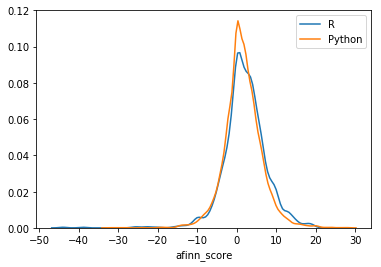

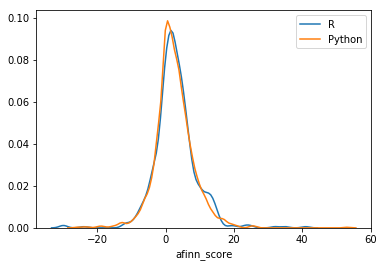

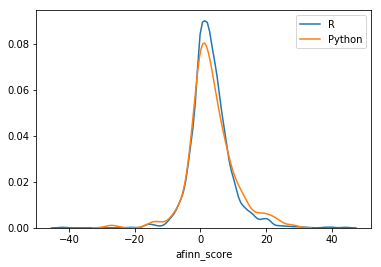

In [13]:
from afinn import Afinn 

scorer = Afinn()

def make_density_plot(data, scorer = scorer):
    r_data  = data[data.tags_l.apply(lambda x: 'r' in x)]
    py_data = data[data.tags_l.apply(lambda x: 'python' in x)]

    r_data['afinn_score'] = r_data.text.apply(scorer.score)
    py_data['afinn_score'] = py_data.text.apply(scorer.score)

    sns.distplot(r_data.afinn_score, label = 'R', hist=False)
    sns.distplot(py_data.afinn_score, label = 'Python', hist = False)
    plt.legend()
    plt.show()
    
    
make_density_plot(overflow_df); make_density_plot(datascience_df); make_density_plot(stats_df)

**Ex. 12.2.4** Afinn is a fairly simple lexical approach, next you should try out a slightly more complex method. Load the _argument_ dictionary by running the line (after downloading text2arg.pkl from Absalon and placing it in the same folder as your notebook.)
```python
class2re,string_test = pickle.load(open('text2arg.pkl','rb'))
```
You need to do a little bit of coding to get scores from the lexicon. `class2re` is a dictionary where keys are a specific type of argumentation and the values are regex'es that pick up this specific argumentation trait. Write a function that loops through the key-value pairs of class2re (_Hint:_ `dict.items()`). Use the `re.findall` method to get all matches for a specific text input. (ask if in doubt about how to do this)

Finally test out the function on the `string_test` snippet.

In [14]:
# [Answer to ex. 12.2.4 here]

In [15]:
class2re, string_test = pickle.load(open('lexicon_functions/text2arg.pkl','rb'))

def text2argfeatures(text):
    d = {}
    for name,regex in class2re.items():
        d[name] = len(regex.findall(text))
    return d


text2argfeatures(string_test)

{'inconsistency': 18,
 'conditionals': 8,
 'contrast': 12,
 'emphasis': 30,
 'causation': 38,
 'wants': 6,
 'difficulty': 11,
 'inyourshoes': 4,
 'rhetoricalquestion': 5,
 'assessments': 24,
 'generalization': 5,
 'structure': 3,
 'necessity': 25,
 'doubt': 4,
 'priority': 8,
 'possibility': 21,
 'authority': 1}

**Ex.12.2.5** apply the arguments regexes to the data containing the either an `r` or `python` tag. Show the density of the _causation_ score in each of the three datasets

In [ ]:
# [Answer to ex. 12.2.5 here]

/home/kristian/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


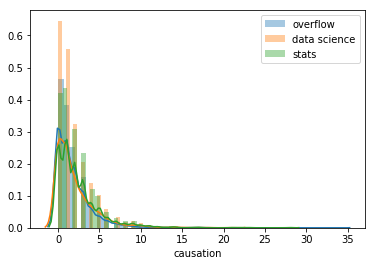

In [40]:
def argument_score(data, arg_type):
    data = data[data.tags_l.apply(lambda x: 'python' in x or 'r' in x)]
    data[arg_type] = data.text.apply(lambda s: text2argfeatures(s)[arg_type])
    return data 

overflow_df = argument_score(overflow_df, 'causation')
datascience_df = argument_score(datascience_df, 'causation')
stats_df = argument_score(stats_df, 'causation')

sns.distplot(overflow_df.causation, label = 'overflow')
sns.distplot(datascience_df.causation, label = 'data science')
sns.distplot(stats_df.causation, label = 'stats')
plt.legend()

**Ex. 12.2.6 (BONUS)** The last approach you will try is a mix of sentiment/topic lexicons from multiple source. Load the raw data by running
```python
w2conglomerate,conglomerate_cols = pickle.load(open('conglomerate.pkl','rb'))
```
Try to make sense of the contents of `w2conglomerate` and `conglomerate_cols`. Test the lexicon on the `string_test` you were given in ex. 1.2.4. Then apply the lexicon to get the _joy_ score of `r` and `python` tagged posts across all three datasets. 

In [ ]:
# [Answer to ex. 12.2.6 here]

In [68]:
w2conglomerate,conglomerate_cols = pickle.load(open('lexicon_functions/conglomerate.pkl','rb'))

def get_conglomerate_scores(doc,tokenizer=nltk.word_tokenize,agg='mean'):
    if type(doc)==str:
        doc = tokenizer(doc)
        
    assert type(doc)==list,"please input either a list or a string"
    
    matches = []
    for w in doc:
        w = w.lower()
        
        if w in w2conglomerate:
            matches.append(dict(list(zip(conglomerate_cols,w2conglomerate[w]))))
            
    if len(matches)==0:
        return dict(list(zip(conglomerate_cols,[np.nan]*len(conglomerate_cols))))
    
    scores = pd.DataFrame(matches)
    if agg=='mean':
        scores = scores.mean()
    elif agg =='max':
        scores  = scores.max()
    else:
        assert hasattr(agg,'__call__'),'"agg" should be a function if not "mean" or "max"'
        scores = agg(scores)
        
    return dict(scores)


print(get_conglomerate_scores(string_test))


def conglomerate_score(data):
    r_data  = data[data.tags_l.apply(lambda x: 'r' in x)]
    py_data = data[data.tags_l.apply(lambda x: 'python' in x)]
    
    r_data['conglomerate'] = r_data['text'].apply(get_conglomerate_scores)
    py_data['conglomerate'] = py_data['text'].apply(get_conglomerate_scores)

    return r_data, py_data


def extract_joy(data):
    data['joy'] = data.conglomerate.apply(lambda x: x['emotion_joy'])
    return data 

r_data, py_data = conglomerate_score(overflow_df)
r_data = extract_joy(r_data)
py_data = extract_joy(py_data)

{'emotion_anger': 0.03278688524590164,
 'emotion_anticipation': 0.05081967213114754,
 'emotion_disgust': 0.003278688524590164,
 'emotion_fear': 0.03278688524590164,
 'emotion_joy': 0.021311475409836064,
 'emotion_sadness': 0.01639344262295082,
 'emotion_surprise': 0.003278688524590164,
 'emotion_trust': 0.040983606557377046,
 'orientation_active': 0.3081967213114754,
 'orientation_passive': 0.14754098360655737,
 'sentiment_negative': 0.17540983606557378,
 'sentiment_positive': 0.3377049180327869,
 'subjectivity_strong': 0.2442622950819672,
 'subjectivity_weak': 0.28524590163934427}